In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [19]:
np.random.seed(0)

In [20]:
# get IoU overlap ratio
def iou(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])

    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
    iou = area_iou / (area_a + area_b - area_iou)

    return iou

最終的にはイモリの顔か否かを判別する識別器を作りたい。そのためにはイモリの顔の画像とイモリの顔以外の画像が必要になる。それらを用意するためのプログラムを作成する。

そのためにはイモリの顔周辺を一枚の画像から切り抜く必要がある。 そこで一つの矩形を設定して(GT: Ground-truth, 正解と呼ぶ)、ランダムに切り抜いた矩形がGTとある程度重なっていれば、イモリの顔となる。

その重なり具合を計算するのが、IoU: Intersection over unionである。

In [21]:
# crop and create database
def crop_bbox(img, gt, Crop_N=200, L=60, th=0.5):
    # get shape
    H, W, C = img.shape

    # each crop
    for i in range(Crop_N):
        # get left top x of crop bounding box
        x1 = np.random.randint(W - L)
        # get left top y of crop bounding box
        y1 = np.random.randint(H - L)
        # get right bottom x of crop bounding box
        x2 = x1 + L
        # get right bottom y of crop bounding box
        y2 = y1 + L

        # crop bounding box
        crop = np.array((x1, y1, x2, y2))

        # get IoU between crop box and gt
        _iou = iou(gt, crop)

        # assign label
        if _iou >= th:
            cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 1)
            label = 1
        else:
            cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1)
            label = 0

    return img

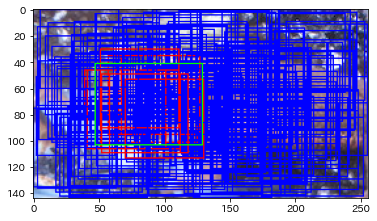

In [22]:
# read image
img = cv2.imread("../assets/imori_1.jpg")

# gt bounding box
gt = np.array((47, 41, 129, 103), dtype=np.float32)

# get crop bounding box
img = crop_bbox(img, gt)

# draw gt
cv2.rectangle(img, (gt[0], gt[1]), (gt[2], gt[3]), (0,255,0), 1)

plt.imshow(img[:,:,::-1])

１．np.random.seed(0)として、切り抜く矩形の左上のx1 = np.random.randint(W-60), y1=np.random.randint(H-60)で求めよ。

２．GT (gt = np.array((47, 41, 129, 103), dtype=np.float32))とのIoUが0.5以上の時はその矩形に教師ラベル1, 0.5未満の場合はラベル0を与えよ。